# Exercise 4 - Deep learning

Note:

Inspirations:
- https://github.com/tuwien-musicir/DeepLearning_Tutorial/
- https://www.cs.toronto.edu/~kriz/cifar.html

## CIFAR-10

- https://www.cs.toronto.edu/~kriz/cifar.html


The training dataset consists of 50000 32x32 images in 10 different classes, in every of this classes there are 5000 images.

The test dataset consists of 10000 32x32 images in 10 different classes, in every of this classes there are 1000 images.

- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

The images are an array with a length of 3072 element (1024x3)

## Import dependencies

In [29]:
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Convolution2D, Dense, Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
from tensorflow import keras
import pickle

randomState = 11776836
np.random.seed(randomState)

epochs = 6
batchSize = 32

## Load dataset

Load the data-batches

In [30]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


path = '../data/cifar-10/data'
files = glob.glob(os.path.join(path, '*_*'))

print('Imported ' + str(len(files)) + ' files')

Imported 5 files


## Load the images

In [31]:
images = np.empty([0, 3072], dtype=np.ubyte)
imageNames = []
imageLabels = []

for filename in files:
    fileData = unpickle(filename)
    imageNames.extend(fileData[b'filenames'])
    imageLabels.extend(fileData[b'labels'])
    images = np.append(images, fileData[b'data'], axis=0)

print(len(images), 'images', len(imageNames), 'imageNames', len(imageLabels), 'imageLabels')

50000 images 50000 imageNames 50000 imageLabels


## Create the Groundtruth

In [32]:
# look at the first 25 classes
print("Look at the first 25 labels")
print(imageLabels[0:25], '\n')

uniqueImageLabelSet = set(imageLabels)
print(len(uniqueImageLabelSet), 'unique image labels were found', uniqueImageLabelSet, '\n')

print("Groundtruth Statistics:")
for v in uniqueImageLabelSet:
    print("Class", v, ":", imageLabels.count(v))

# The classes are very balanced
imageClasses = np_utils.to_categorical(imageLabels)

Look at the first 25 labels
[1, 8, 5, 1, 5, 7, 4, 3, 8, 2, 7, 2, 0, 1, 5, 9, 6, 2, 0, 8, 2, 7, 0, 4, 1] 

10 unique image labels were found {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} 

Groundtruth Statistics:
Class 0 : 5000
Class 1 : 5000
Class 2 : 5000
Class 3 : 5000
Class 4 : 5000
Class 5 : 5000
Class 6 : 5000
Class 7 : 5000
Class 8 : 5000
Class 9 : 5000


## Standardization

In [33]:
print("Image values statistics:")
print('Min pixel value', images.min())
print('Max pixel value', images.max())

meanValue = images.mean()
stddevValue = images.std()

print('Mean', meanValue)
print('Standard Deviation', stddevValue)

Image values statistics:
Min pixel value 0
Max pixel value 255
Mean 120.70756512369792
Standard Deviation 64.15007589112129


In [34]:
standardizedImagesValue = (images - meanValue) / stddevValue
standardizedImagesValue = np.array(standardizedImagesValue, dtype=float)

print('Standardized mean', standardizedImagesValue.mean())
print('Standardized standard deviation', standardizedImagesValue.std())

print('Standardized min pixel value', standardizedImagesValue.min())
print('Standardized max pixel value', standardizedImagesValue.max())

Standardized mean -1.562009780779287e-17
Standardized standard deviation 1.0000000000000002
Standardized min pixel value -1.8816433721538977
Standardized max pixel value 2.0934103819959606


## Creating NN Models in Keras

### 1) Fully Connected NN

In [35]:
print(standardizedImagesValue.shape)

(50000, 3072)


In [36]:
# find out input shape for NN, which is just a long vector
inputShape = standardizedImagesValue.shape[1]
print('Input shape for NN: ', inputShape)

Input shape for NN:  3072


### Creating a Model


In [37]:
# simple Fully-connected network

model = Sequential()
model.add(Dense(256, input_dim=inputShape))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(len(uniqueImageLabelSet), activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 256)               786688    
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


### Defining Loss Function and Optimizer Strategy: Gradient Descent

In [38]:
# Define a loss function
loss = 'categorical_crossentropy'  # 'categorical_crossentropy' for multi-class problems

# Optimizer = Stochastic Gradient Descent
optimizer = 'sgd'

# Compiling the model
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

### Training the model on the input dataset

In [39]:
# train the model
model.fit(standardizedImagesValue, imageClasses, batch_size=batchSize, epochs=epochs)

2022-06-30 08:09:51.521492: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/6
1563/1563 [==============================] - 12s 7ms/step - loss: 1.8247 - accuracy: 0.3615
Epoch 2/6
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6957 - accuracy: 0.4154
Epoch 3/6
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6435 - accuracy: 0.4350
Epoch 4/6
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6056 - accuracy: 0.4468
Epoch 5/6
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5734 - accuracy: 0.4617
Epoch 6/6
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5438 - accuracy: 0.4711


#### Verify accuracy on training set

In [40]:
predictions = model.predict(standardizedImagesValue)
predictedClassesTrain = np.argmax(predictions, axis=1)
trainImageLabelsForComparison = np.array(imageLabels)
accuracyTrainingSet = accuracy_score(trainImageLabelsForComparison, predictedClassesTrain)

print('Accuracy:', accuracyTrainingSet)

  10/1563 [..............................] - ETA: 9s  

2022-06-30 08:10:51.108931: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 5s 3ms/step
Accuracy: 0.48484


### Testing with Test data set

In [41]:
path = '../data/cifar-10'
files = glob.glob(os.path.join(path, 'test_batch'))
print('Imported', len(files), 'file.')

Imported 1 file.


In [42]:
testImages = np.empty([0, 3072], dtype=np.ubyte)
testImageNames = []
testImageLabels = []

for filename in files:
    fileData = unpickle(filename)
    testImageNames.extend(fileData[b'filenames'])
    testImageLabels.extend(fileData[b'labels'])
    testImages = np.append(testImages, fileData[b'data'], axis=0)

print(len(images), 'images', len(imageNames), 'imageNames', len(imageLabels), 'imageLabels')

comparisonTestImageLabels = np.array(testImageLabels)
testImageClasses = np_utils.to_categorical(testImageLabels)

50000 images 50000 imageNames 50000 imageLabels


In [43]:
print("Groundtruth Statistics:")
for v in set(testImageLabels):
    print("Label", v, ":", testImageLabels.count(v))

Groundtruth Statistics:
Label 0 : 1000
Label 1 : 1000
Label 2 : 1000
Label 3 : 1000
Label 4 : 1000
Label 5 : 1000
Label 6 : 1000
Label 7 : 1000
Label 8 : 1000
Label 9 : 1000


### Standardize Test Set

In [44]:
print(testImages.mean(), testImages.std())

standardDeviationTestImages = (testImages - meanValue) / stddevValue

print(standardDeviationTestImages.mean(), standardDeviationTestImages.std())

121.52915475260417 64.06097012299574
0.012807305642174001 0.9986109795368486


### Make predictions

In [45]:
testPrediction = model.predict(standardDeviationTestImages)
testPredictionClasses = np.argmax(testPrediction, axis=1)
accuracyTestSet = accuracy_score(comparisonTestImageLabels, testPredictionClasses)
print('Accuracy:', accuracyTestSet)

313/313 [==============================] - 1s 3ms/step
Accuracy: 0.4587


## 2) CNN

In [46]:
nChannels = 3

keras.backend.set_image_data_format('channels_last')
trainImages = standardizedImagesValue.reshape(standardizedImagesValue.shape[0], 32, 32, nChannels)
testImages = standardDeviationTestImages.reshape(standardDeviationTestImages.shape[0], 32, 32, nChannels)

In [47]:
print(trainImages.shape)
print(testImages.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [48]:
# we store the new shape of the images in the 'input_shape' variable.
# take all dimensions except the 0th one (which is the number of images)

inputShape = trainImages.shape[1:]
print(inputShape)

(32, 32, 3)


### Create the CNN model

In [49]:
def createMyModel():
    model = Sequential()

    model.add(Convolution2D(inputShape[0] * 2, (3, 3), input_shape=inputShape, activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))

    model.add(Convolution2D(inputShape[0] * 2, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))

    model.add(Dropout(0.2))
    model.add(Convolution2D(inputShape[0] * 2, (3, 3), activation='relu'))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(inputShape[0] * 2, activation='relu'))
    model.add(keras.layers.Dense(len(uniqueImageLabelSet), activation='softmax'))

    return model


model = createMyModel()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 6, 6, 64)         

### Train the CNN

In [50]:
# Compiling the model
loss = 'categorical_crossentropy'
optimizer = 'sgd'

model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

history = model.fit(trainImages, imageClasses, batch_size=batchSize, epochs=epochs)

Epoch 1/6
1563/1563 [==============================] - 63s 36ms/step - loss: 1.8469 - accuracy: 0.3286
Epoch 2/6
1563/1563 [==============================] - 48s 31ms/step - loss: 1.5520 - accuracy: 0.4425
Epoch 3/6
1563/1563 [==============================] - 49s 31ms/step - loss: 1.4455 - accuracy: 0.4862
Epoch 4/6
1563/1563 [==============================] - 49s 31ms/step - loss: 1.3614 - accuracy: 0.5170
Epoch 5/6
1563/1563 [==============================] - 50s 32ms/step - loss: 1.3006 - accuracy: 0.5390
Epoch 6/6
1563/1563 [==============================] - 53s 34ms/step - loss: 1.2517 - accuracy: 0.5558


### Verify accuracy on test set

In [51]:
# verify accuracy on test set
prediction = model.predict(testImages)
predictedClasses = np.argmax(prediction, axis=1)
accuracyOnTestSet = accuracy_score(comparisonTestImageLabels, predictedClasses)
print('Accuracy:', accuracyOnTestSet)

313/313 [==============================] - 3s 10ms/step
Accuracy: 0.5763


### Plotting the training curve

In [52]:
hist = history.history
hist.keys()

dict_keys(['loss', 'accuracy'])

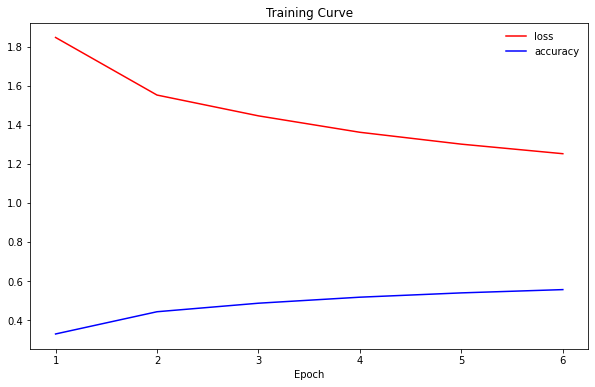

In [53]:
colors = {'loss': 'r', 'accuracy': 'b'}
plt.figure(figsize=(10, 6))
plt.title("Training Curve")
plt.xlabel("Epoch")

for measure in hist.keys():
    color = colors[measure]
    plt.plot(range(1, epochs + 1), hist[measure], color + '-', label=measure)  # use last 2 values to draw line

plt.legend(loc='upper right', scatterpoints=1, frameon=False)

The second epoch has the highest increase in accuracy. Afterwards the increase was not very much. Due to computational limitation a higher epoch value was not chosen.

## Data Augmentation

In [54]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# recreate and recompile the model (otherwise we continue learning)
model = createMyModel()
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

# fits the model on batches with real-time data augmentation:
history = model.fit(datagen.flow(trainImages, imageClasses, batch_size=batchSize),
                    epochs=epochs)

Epoch 1/6
1563/1563 [==============================] - 48s 31ms/step - loss: 2.1384 - accuracy: 0.2069
Epoch 2/6
1563/1563 [==============================] - 48s 31ms/step - loss: 1.9307 - accuracy: 0.2870
Epoch 3/6
1563/1563 [==============================] - 50s 32ms/step - loss: 1.8661 - accuracy: 0.3103
Epoch 4/6
1563/1563 [==============================] - 50s 32ms/step - loss: 1.8220 - accuracy: 0.3269
Epoch 5/6
1563/1563 [==============================] - 49s 31ms/step - loss: 1.7853 - accuracy: 0.3417
Epoch 6/6
1563/1563 [==============================] - 49s 32ms/step - loss: 1.7519 - accuracy: 0.3567


In [55]:
# verify accuracy on test set with augmentation
predictions = model.predict(testImages)
predicatedClasses = np.argmax(predictions, axis=1)
accuracy = accuracy_score(comparisonTestImageLabels, predicatedClasses)
print('Accuracy', accuracy)

313/313 [==============================] - 3s 9ms/step
Accuracy 0.3449


### Plotting the training curve with data augmentation

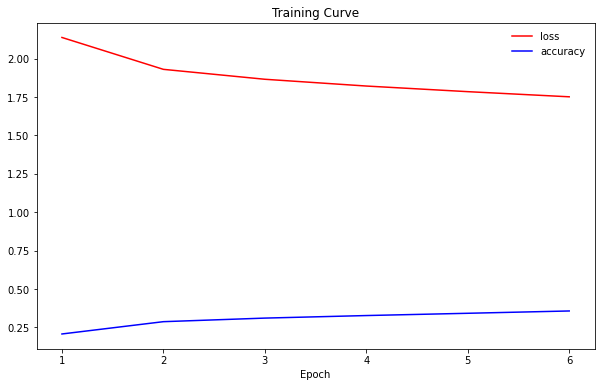

In [56]:
hist = history.history

plt.figure(figsize=(10, 6))
plt.title("Training Curve")
plt.xlabel("Epoch")

for measure in hist.keys():
    color = colors[measure]
    plt.plot(range(1, epochs + 1), hist[measure], color + '-', label=measure)

plt.legend(loc='upper right', scatterpoints=1, frameon=False)

The results are very similar to the results without data augmentation. The second epoch also achieved the best results.

## Analysis

Every class contains 10% of the images. Therefore, the minimum accuracy can be proposed as 0.1.

The NN which I trained for this exercise has taken about 10 seconds per epoch. The loss was about 1.54 and the accuracy was 0.47. The accuracy on the test-set was 0.57.

The CNN which I trained has taken about 50 seconds. The loss was about 1.23 and the accuracy was about 0.56.
The test-set achieved a result of 0.57.


Data Augmentation did not perform well, because the training time of the epochs was about the same. But the accuracy and the loss are worse. There is a loss of 1.82 and an accuracy of 0.32 on the test-set. On the test-set an accuracy of 0.36 was achieved.
